In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/waste-classification-data (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5515.jpg  
  i

In [ ]:
train_path = "DATASET/Train"
val_path = "DATASET/Test"

In [ ]:
!ls

dataset  DATASET  drive  sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

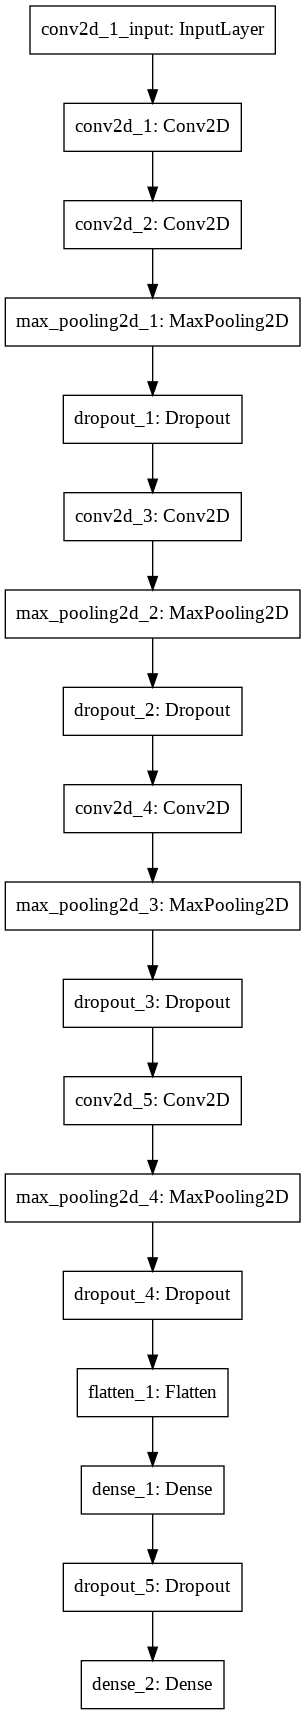

In [ ]:
from keras.utils import plot_model
plot_model (model, to_file = "Model.png")

In [ ]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255, #normalize to work with small weight values
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'DATASET/TRAIN',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 22564 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'DATASET/TEST',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2513 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

top_layers = "top_layer.hdf5"

checkpoint = ModelCheckpoint(top_layers, monitor='loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="loss", mode="min", patience=5)

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=24,
    epochs = 22,
    validation_data = validation_generator,
    validation_steps = 2,
    #callbacks=[checkpoint, early]
)

Epoch 1/22
24/24 [==============================] - 10s 421ms/step - loss: 0.3687 - accuracy: 0.8594 - val_loss: 0.2926 - val_accuracy: 0.9219
Epoch 2/22
24/24 [==============================] - 10s 403ms/step - loss: 0.3438 - accuracy: 0.8620 - val_loss: 0.1138 - val_accuracy: 0.9688
Epoch 3/22
24/24 [==============================] - 10s 403ms/step - loss: 0.3542 - accuracy: 0.8490 - val_loss: 0.3682 - val_accuracy: 0.8594
Epoch 4/22
24/24 [==============================] - 10s 403ms/step - loss: 0.3910 - accuracy: 0.8398 - val_loss: 0.3225 - val_accuracy: 0.9219
Epoch 5/22
24/24 [==============================] - 10s 409ms/step - loss: 0.3680 - accuracy: 0.8646 - val_loss: 0.2538 - val_accuracy: 0.9062
Epoch 6/22
24/24 [==============================] - 10s 406ms/step - loss: 0.3385 - accuracy: 0.8594 - val_loss: 0.2925 - val_accuracy: 0.8438
Epoch 7/22
24/24 [==============================] - 10s 405ms/step - loss: 0.3750 - accuracy: 0.8438 - val_loss: 0.3598 - val_accuracy: 0.9062

In [ ]:
model.save("model_waste.h5")

In [ ]:
model.evaluate_generator(train_generator)

[0.3111876845359802, 0.8650504946708679]

In [ ]:
model.evaluate_generator(validation_generator)

[0.32536542415618896, 0.8953441977500916]

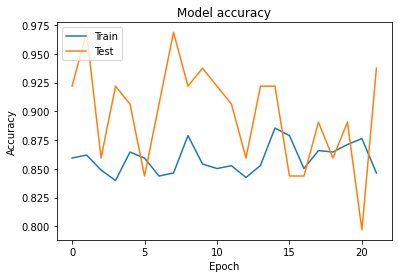

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

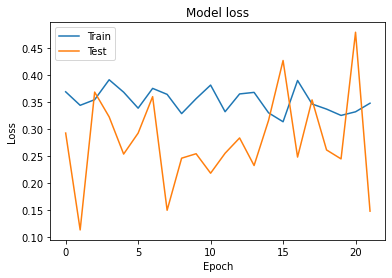

In [ ]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir("./DATASET/TEST/R/"):
  img = image.load_img("./DATASET/TEST/R/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./DATASET/TEST/O/"):
  img = image.load_img("./DATASET/TEST/O/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = confusion_matrix(y_actual, y_test)